In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [27]:
dataset_path = '/kaggle/input/deepfake-faces/metadata.csv'

In [28]:
df = pd.read_csv(dataset_path)

In [29]:
df.head()

,videoname,original_width,original_height,label,original
0,aznyksihgl.mp4,129,129,FAKE,xnojggkrxt.mp4
1,gkwmalrvcj.mp4,129,129,FAKE,hqqmtxvbjj.mp4
2,lxnqzocgaq.mp4,223,217,FAKE,xjzkfqddyk.mp4
3,itsbtrrelv.mp4,186,186,FAKE,kqvepwqxfe.mp4
4,ddvgrczjno.mp4,155,155,FAKE,pluadmqqta.mp4


In [30]:
df.tail()

,videoname,original_width,original_height,label,original
95629,rqcsjlsmiz.mp4,129,129,FAKE,pbsccacgff.mp4
95630,xjmnerypjf.mp4,90,90,FAKE,qrjydgidga.mp4
95631,hnewpzhihy.mp4,75,75,FAKE,vabhbfiifl.mp4
95632,okbarlnmwm.mp4,268,267,FAKE,uqaaspbgtz.mp4
95633,asddammewq.mp4,90,90,FAKE,yfjkgiynbi.mp4


In [31]:
df.shape

(95634, 5)

In [32]:
df.columns

Index(['videoname', 'original_width', 'original_height', 'label', 'original'], dtype='object')

In [33]:
df.duplicated().sum()

0

In [34]:
df.isnull().sum()

videoname              0
original_width         0
original_height        0
label                  0
original           16293
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95634 entries, 0 to 95633
Data columns (total 5 columns):
videoname          95634 non-null object
original_width     95634 non-null int64
original_height    95634 non-null int64
label              95634 non-null object
original           79341 non-null object
dtypes: int64(2), object(3)
memory usage: 3.6+ MB


In [36]:
df.nunique()

videoname          95634
original_width        31
original_height       34
label                  2
original           16955
dtype: int64

In [37]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['videoname', 'label', 'original'], dtype='object')

Numerical type columns:
Index(['original_width', 'original_height'], dtype='object')


In [38]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [39]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [40]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['label']
Non-Categorical Features: ['videoname', 'original']
Discrete Features: []
Continuous Features: ['original_width', 'original_height']


In [41]:
df = df.fillna("Not Available")

In [42]:
for i in categorical:
    print(i,':', df[i].unique())
    print()

label : ['FAKE' 'REAL']



In [43]:
for i in categorical:
    print(df[i].value_counts())
    print()

FAKE    79341
REAL    16293
Name: label, dtype: int64



In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
import warnings
warnings.filterwarnings('ignore')

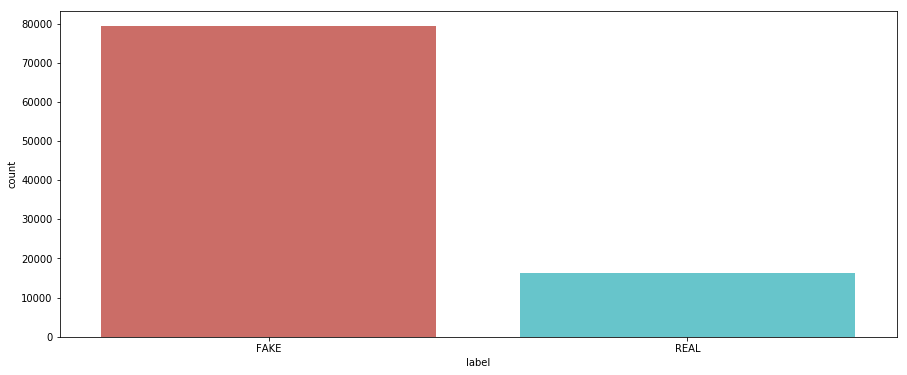

In [46]:
for i in categorical:
    plt.figure(figsize=(15,6))
    sns.countplot(x = df[i], data = df, palette = 'hls')
    plt.show()

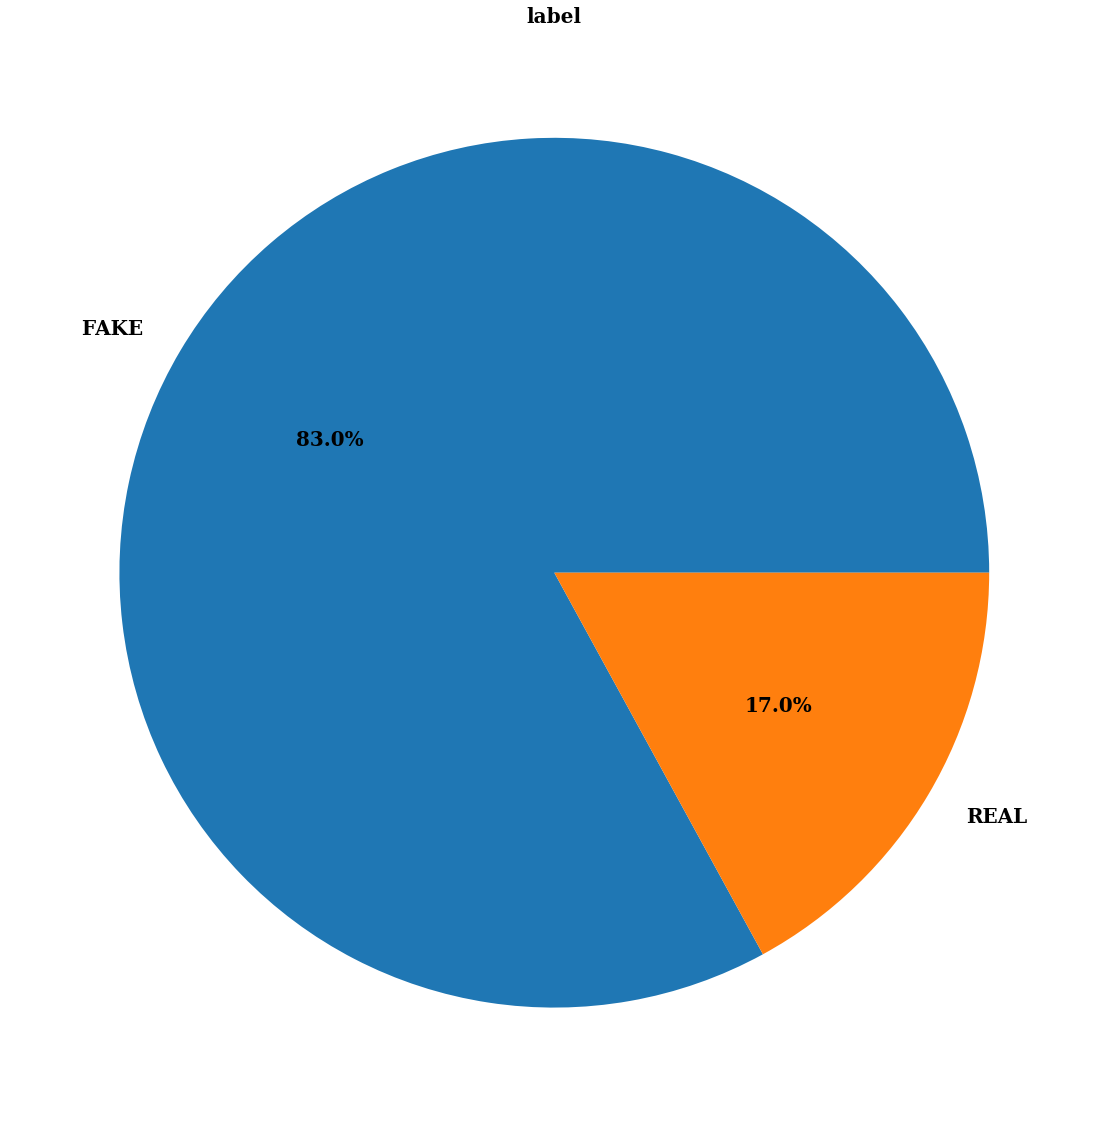

In [47]:
for i in categorical:
    plt.figure(figsize=(30,20)) 
    plt.pie(df[i].value_counts(), labels=df[i].value_counts().index, 
            autopct='%1.1f%%', textprops={ 'fontsize': 20,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' }) 
    hfont = {'fontname':'serif', 'weight': 'bold'}
    plt.title(i, size=20, **hfont) 
    plt.show()

In [48]:
# !pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


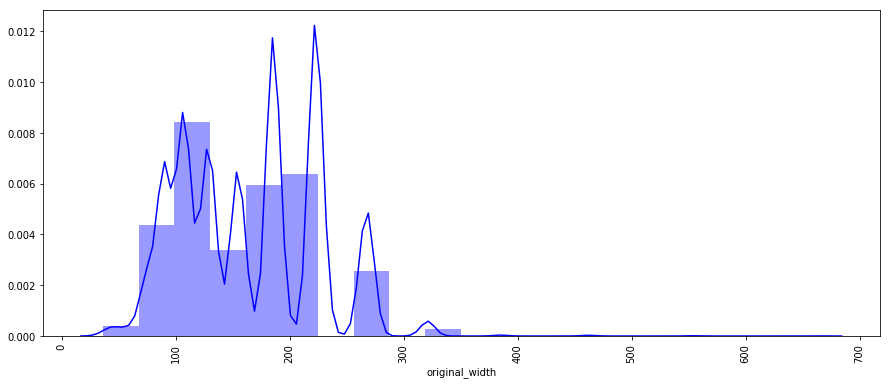

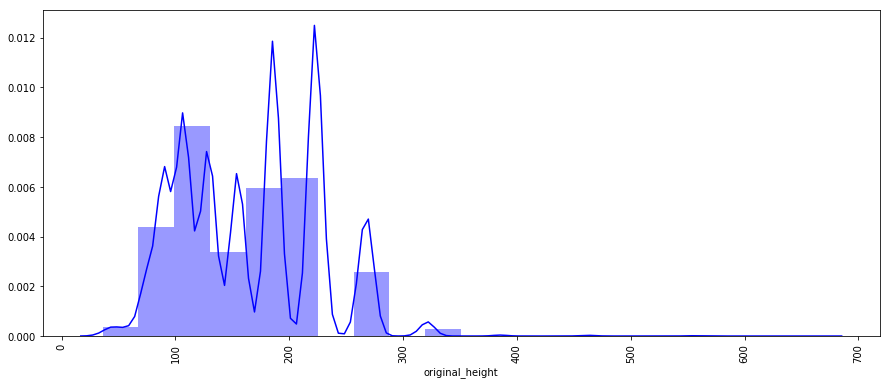

In [49]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], kde=True, bins=20, color='b')  # 'color' instead of 'palette'
    plt.xticks(rotation=90)
    plt.show()

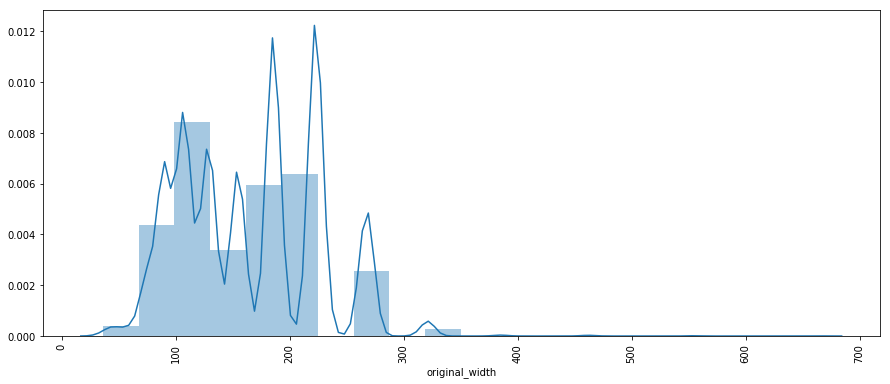

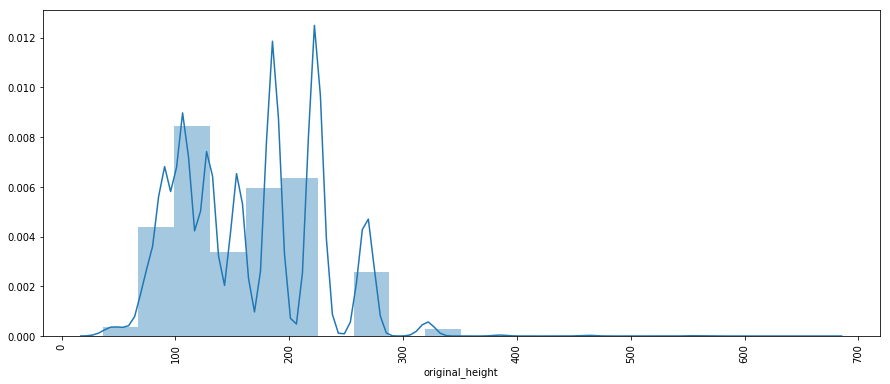

In [50]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], kde = True, bins = 20)
    plt.xticks(rotation = 90)
    plt.show()

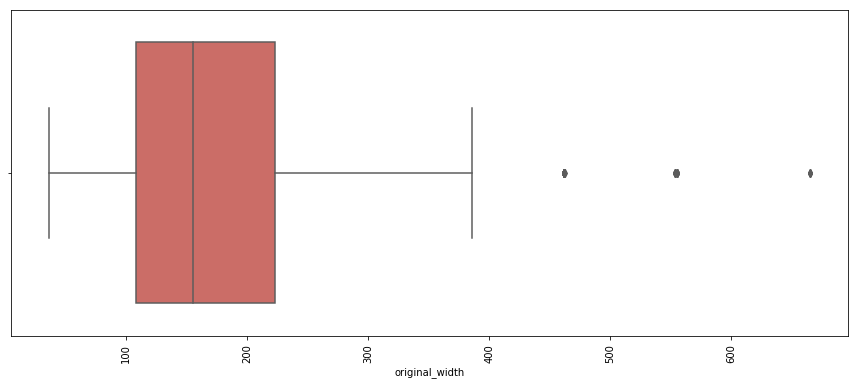

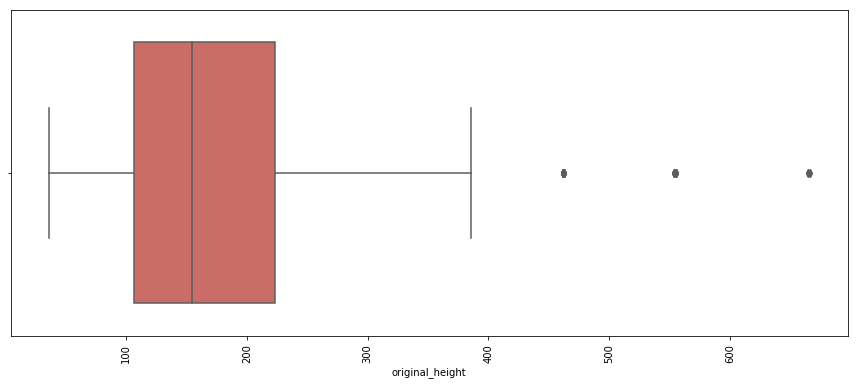

In [51]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(x = df[i],data = df, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

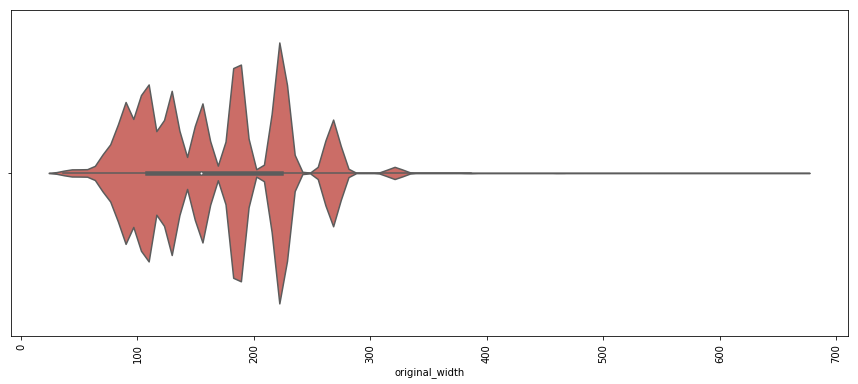

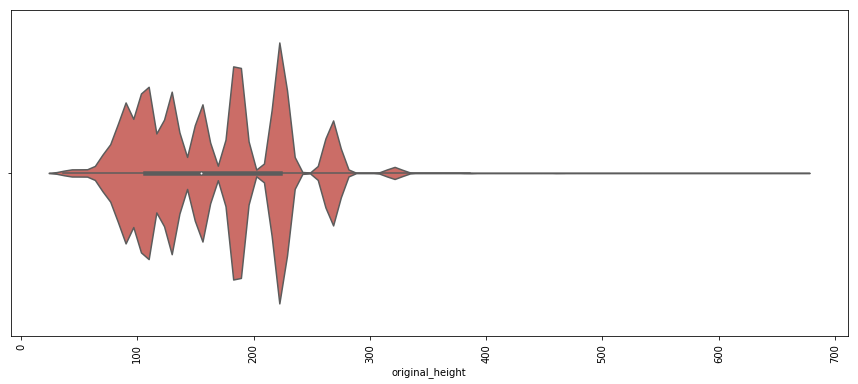

In [52]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.violinplot(x = df[i],data = df, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

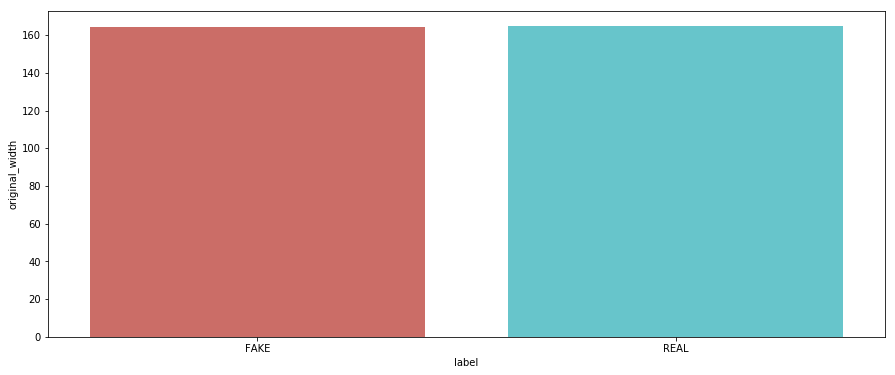

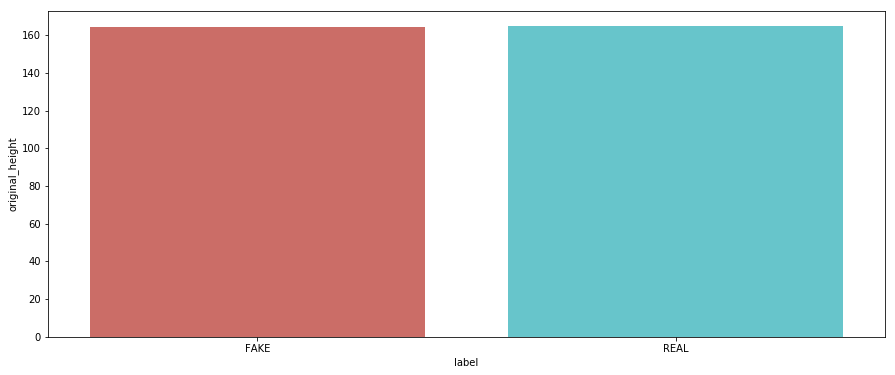

In [53]:
for i in categorical:
    for j in numerical_columns:
        plt.figure(figsize=(15,6))
        sns.barplot(x = df[i], y = df[j], data = df, ci = None, palette = 'hls')
        plt.show()

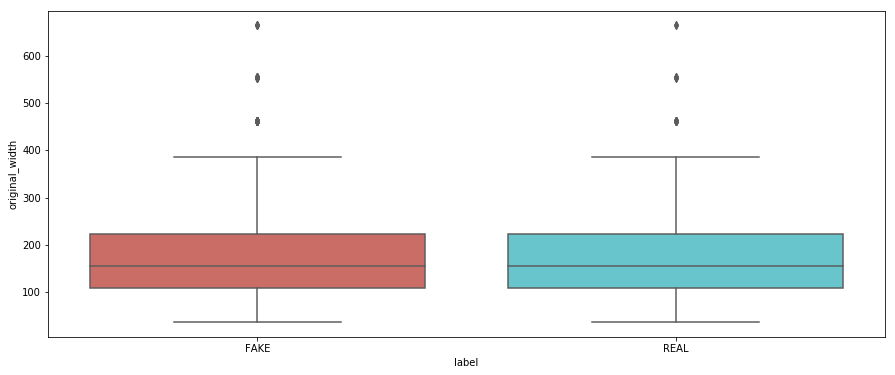

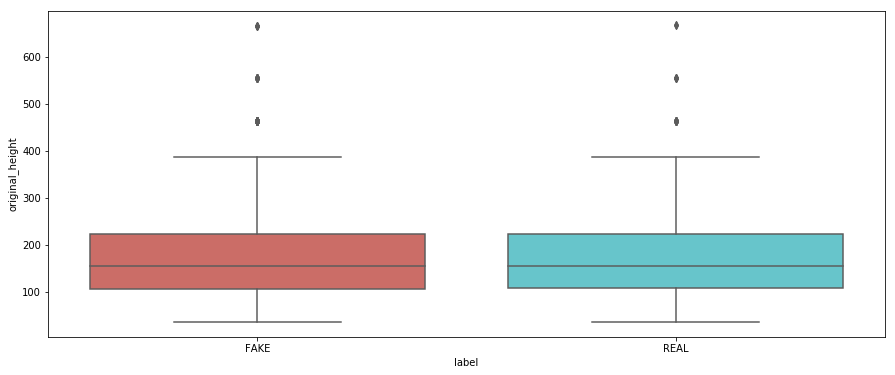

In [54]:
for i in categorical:
    for j in numerical_columns:
        plt.figure(figsize=(15,6))
        sns.boxplot(x = df[i], y = df[j], data = df, palette = 'hls')
        plt.show()

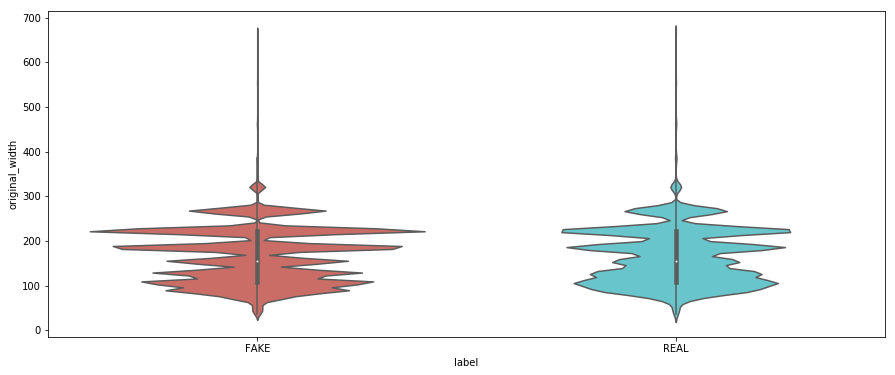

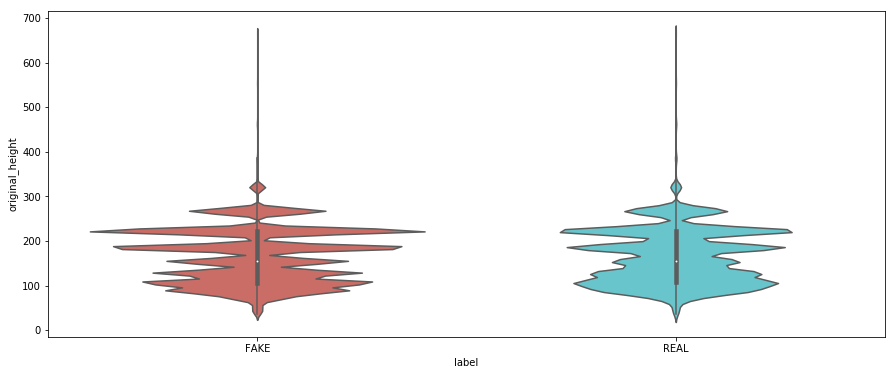

In [55]:
for i in categorical:
    for j in numerical_columns:
        plt.figure(figsize=(15,6))
        sns.violinplot(x = df[i], y = df[j], data = df, palette = 'hls')
        plt.show()

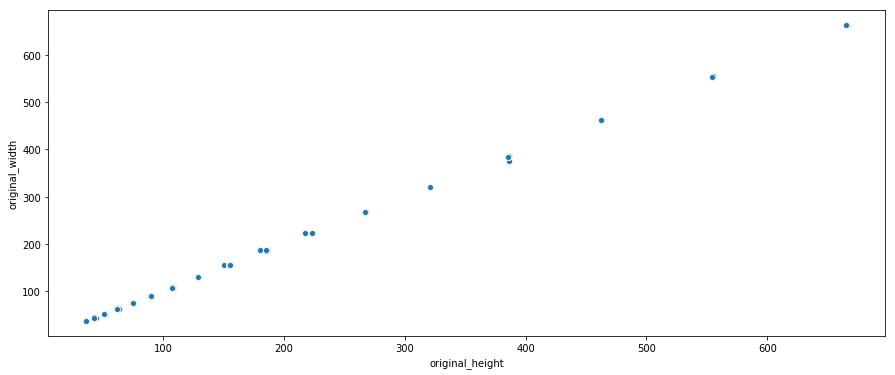

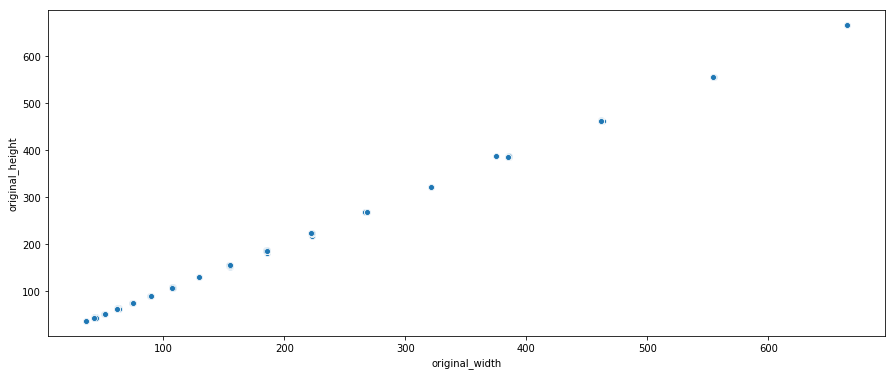

In [56]:
for i in numerical_columns:
    for j in numerical_columns:
        if i != j:
            plt.figure(figsize=(15,6))
            sns.scatterplot(x = df[j], y = df[i], data = df, palette = 'hls')
            plt.show()

In [57]:
real_df = df[df["label"] == "REAL"]
fake_df = df[df["label"] == "FAKE"]
sample_size = 10000

real_df = real_df.sample(sample_size, random_state=42)
fake_df = fake_df.sample(sample_size, random_state=42)

sample_meta = pd.concat([real_df, fake_df])

In [58]:
from sklearn.model_selection import train_test_split

Train_set, Test_set = train_test_split(sample_meta,test_size=0.2,random_state=42,stratify=sample_meta['label'])
Train_set, Val_set  = train_test_split(Train_set,test_size=0.3,random_state=42,stratify=Train_set['label'])

In [59]:
Train_set.shape,Val_set.shape,Test_set.shape

((11200, 5), (4800, 5), (4000, 5))

In [60]:
import cv2

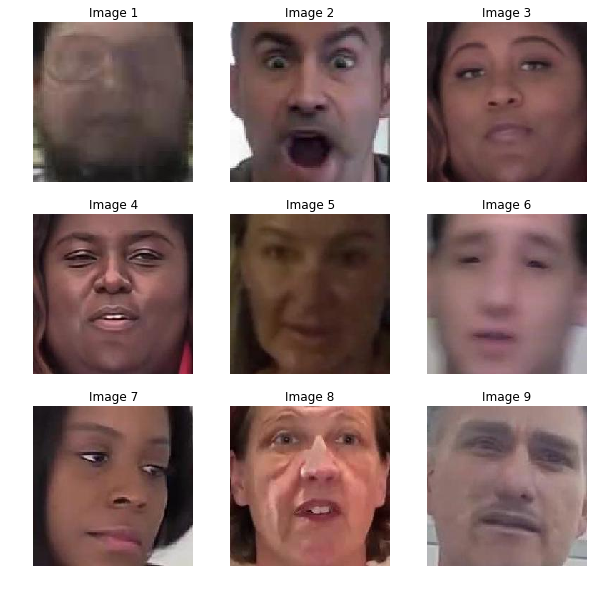

In [61]:
image_path = '/kaggle/input/deepfake-faces/faces_224/'

image_files = os.listdir(image_path)

image_files.sort()

selected_images = image_files[:9]

plt.figure(figsize=(10, 10))

for index, image_file in enumerate(selected_images):
    image = cv2.imread(os.path.join(image_path, image_file))

    plt.subplot(3, 3, index + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Image {index + 1}')
    plt.axis('off')

plt.show()

In [62]:
for i, image_file in enumerate(image_files[:10]):
    image = cv2.imread(os.path.join(image_path, image_file))
    if image is not None:
        height, width, _ = image.shape
        print(f"Resolution of image {i+1}: {width} x {height}")
    else:
        print(f"Error reading image {i+1}")

if len(image_files) < 10:
    print(f"Only {len(image_files)} images found in the directory.")

Resolution of image 1: 224 x 224
Resolution of image 2: 224 x 224
Resolution of image 3: 224 x 224
Resolution of image 4: 224 x 224
Resolution of image 5: 224 x 224
Resolution of image 6: 224 x 224
Resolution of image 7: 224 x 224
Resolution of image 8: 224 x 224
Resolution of image 9: 224 x 224
Resolution of image 10: 224 x 224


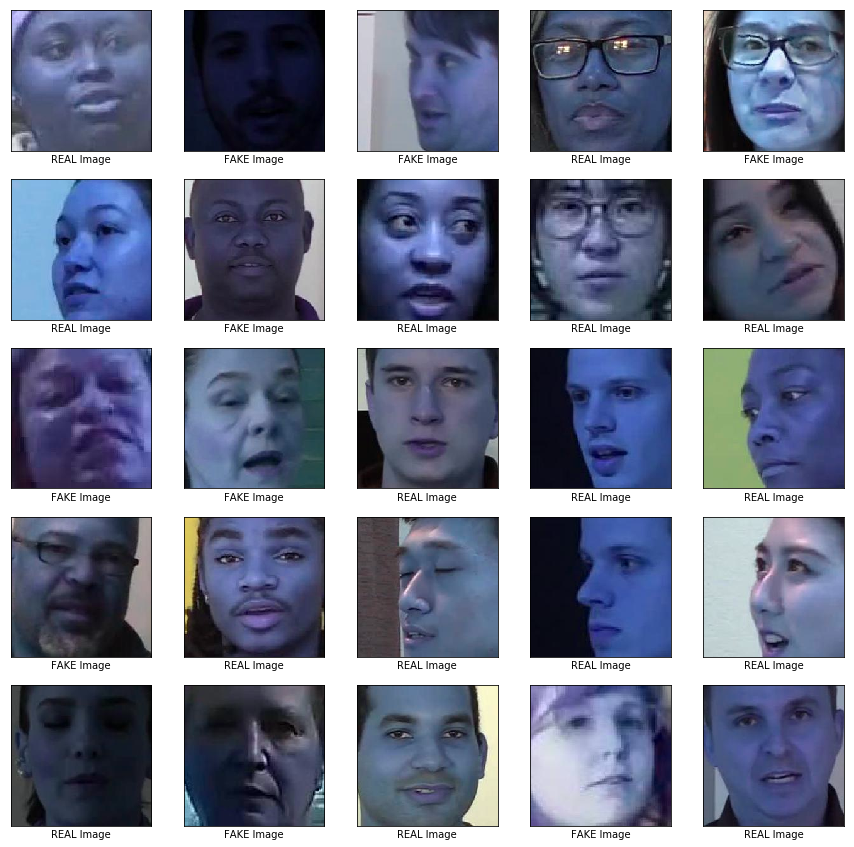

In [63]:
plt.figure(figsize=(15,15))
for cur,i in enumerate(Train_set.index[25:50]):
    plt.subplot(5,5,cur+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(cv2.imread('../input/deepfake-faces/faces_224/'+Train_set.loc[i,'videoname'][:-4]+'.jpg'))
    
    if(Train_set.loc[i,'label']=='FAKE'):
        plt.xlabel('FAKE Image')
    else:
        plt.xlabel('REAL Image')
        
plt.show()

In [64]:
def retreive_dataset(set_name):
    images,labels=[],[]
    for (img, imclass) in zip(set_name['videoname'], set_name['label']):
        images.append(cv2.imread('../input/deepfake-faces/faces_224/'+img[:-4]+'.jpg'))
        if(imclass=='FAKE'):
            labels.append(1)
        else:
            labels.append(0)
    
    return np.array(images),np.array(labels)

In [65]:
X_train,y_train=retreive_dataset(Train_set)
X_val,y_val=retreive_dataset(Val_set)
X_test,y_test=retreive_dataset(Test_set)

In [66]:
import tensorflow as tf
from tensorflow.keras import layers, models
from functools import partial

In [67]:
tf.random.set_seed(42)

In [68]:
DefaultConv2D = partial(layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")

# Model Definition
model = models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[224, 224, 3]),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(units=128, activation="relu",
                 kernel_initializer="he_normal"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(units=64, activation="relu",
                 kernel_initializer="he_normal"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(units=1, activation="sigmoid")
])

In [69]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

In [70]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss="binary_crossentropy", metrics=["accuracy"])

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      9472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 128)       5

In [72]:
history = model.fit(
    X_train, y_train,
    epochs=10,  # Adjust as needed
    batch_size=32,  # Adjust as needed
    validation_data=(X_val, y_val),
    verbose=1
)

Train on 11200 samples, validate on 4800 samples
Epoch 1/10
11200/11200 [==============================] - 38s 3ms/sample - loss: 0.8262 - accuracy: 0.5179 - val_loss: 0.8478 - val_accuracy: 0.5110
Epoch 2/10
11200/11200 [==============================] - 34s 3ms/sample - loss: 0.7075 - accuracy: 0.5501 - val_loss: 0.8113 - val_accuracy: 0.5090
Epoch 3/10
11200/11200 [==============================] - 34s 3ms/sample - loss: 0.6700 - accuracy: 0.5921 - val_loss: 0.6488 - val_accuracy: 0.6183
Epoch 4/10
11200/11200 [==============================] - 34s 3ms/sample - loss: 0.6524 - accuracy: 0.6157 - val_loss: 0.6582 - val_accuracy: 0.6006
Epoch 5/10
11200/11200 [==============================] - 34s 3ms/sample - loss: 0.6357 - accuracy: 0.6357 - val_loss: 0.6446 - val_accuracy: 0.6277
Epoch 6/10
11200/11200 [==============================] - 34s 3ms/sample - loss: 0.6184 - accuracy: 0.6516 - val_loss: 0.7512 - val_accuracy: 0.5069
Epoch 7/10
11200/11200 [==============================] -

In [73]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score

In [74]:
y_test_pred_binary = (y_pred > 0.5).astype(int)

In [75]:
y_train_pred = model.predict(X_train)
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

In [76]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score

train_accuracy = accuracy_score(y_train, y_train_pred_binary)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 81.05%


In [77]:
test_accuracy = accuracy_score(y_test, y_test_pred_binary)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 64.83%


In [78]:
f1 = f1_score(y_test, y_test_pred_binary)
print(f"F1 Score: {f1:.4f}")

precision = precision_score(y_test, y_test_pred_binary)
print(f"Precison: {precision:.4f}")

recall = recall_score(y_test, y_test_pred_binary)
print(f"Recall: {recall:.4f}")

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_test_pred_binary)
print(f"AUC-ROC: {auc_roc:.4f}")

F1 Score: 0.6738
Precison: 0.6282
Recall: 0.7265
AUC-ROC: 0.6483


In [79]:
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1140  860]
 [ 547 1453]]


In [80]:
import scikitplot as skplt

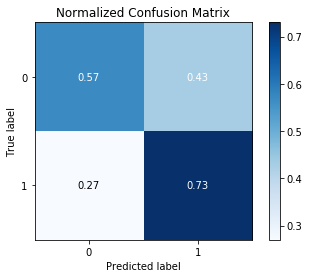

In [81]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_binary, normalize=True)
plt.show()

In [82]:
class_report = classification_report(y_test, y_test_pred_binary)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.57      0.62      2000
           1       0.63      0.73      0.67      2000

    accuracy                           0.65      4000
   macro avg       0.65      0.65      0.65      4000
weighted avg       0.65      0.65      0.65      4000



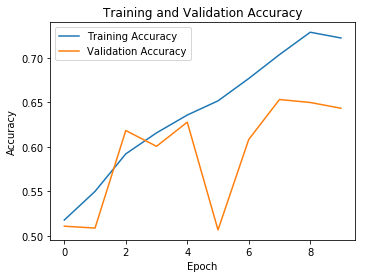

In [83]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

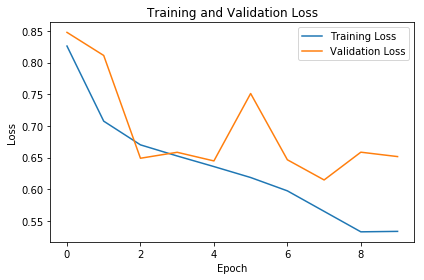

In [84]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [85]:
from tensorflow.keras.applications import ResNet50

In [86]:
input_shape = (224, 224, 3)

In [87]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

94773248/94765736 [==============================] - 0s 0us/step


In [88]:
for layer in base_model.layers:
    layer.trainable = False

In [89]:
model_resnet50 = models.Sequential()
model_resnet50.add(base_model)
model_resnet50.add(layers.GlobalAveragePooling2D())
model_resnet50.add(layers.Dense(1, activation='sigmoid'))

In [90]:
model_resnet50.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [91]:
from tensorflow.keras import optimizers

In [92]:
model_resnet50.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [93]:
history = model_resnet50.fit(
    X_train, y_train,
    epochs=10,  
    validation_data=(X_val, y_val),
    verbose=1
)

Train on 11200 samples, validate on 4800 samples
Epoch 1/10
11200/11200 [==============================] - 34s 3ms/sample - loss: 0.6679 - accuracy: 0.6010 - val_loss: 0.7305 - val_accuracy: 0.5767
Epoch 2/10
11200/11200 [==============================] - 30s 3ms/sample - loss: 0.6083 - accuracy: 0.6729 - val_loss: 0.8552 - val_accuracy: 0.5490
Epoch 3/10
11200/11200 [==============================] - 30s 3ms/sample - loss: 0.5995 - accuracy: 0.6764 - val_loss: 0.8148 - val_accuracy: 0.5590
Epoch 4/10
11200/11200 [==============================] - 30s 3ms/sample - loss: 0.5735 - accuracy: 0.6963 - val_loss: 0.8271 - val_accuracy: 0.5579
Epoch 5/10
11200/11200 [==============================] - 30s 3ms/sample - loss: 0.5661 - accuracy: 0.7041 - val_loss: 0.7069 - val_accuracy: 0.6085
Epoch 6/10
11200/11200 [==============================] - 30s 3ms/sample - loss: 0.5616 - accuracy: 0.7142 - val_loss: 0.8264 - val_accuracy: 0.5633
Epoch 7/10
11200/11200 [==============================] -

In [94]:
y_pred = model_resnet50.predict(X_test)

In [95]:
y_test_pred_binary = (y_pred > 0.5).astype(int)

In [96]:
y_train_pred = model_resnet50.predict(X_train)
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

In [97]:
train_accuracy = accuracy_score(y_train, y_train_pred_binary)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 57.36%


In [98]:
test_accuracy = accuracy_score(y_test, y_test_pred_binary)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 56.60%


In [99]:
f1 = f1_score(y_test, y_test_pred_binary)
print(f"F1 Score: {f1:.4f}")

precision = precision_score(y_test, y_test_pred_binary)
print(f"Precison: {precision:.4f}")

recall = recall_score(y_test, y_test_pred_binary)
print(f"Recall: {recall:.4f}")

F1 Score: 0.6580
Precison: 0.5429
Recall: 0.8350


In [100]:
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 594 1406]
 [ 330 1670]]


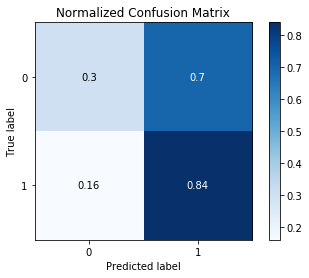

In [101]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_binary, normalize=True)
plt.show()

In [102]:
class_report = classification_report(y_test, y_test_pred_binary)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.30      0.41      2000
           1       0.54      0.83      0.66      2000

    accuracy                           0.57      4000
   macro avg       0.59      0.57      0.53      4000
weighted avg       0.59      0.57      0.53      4000



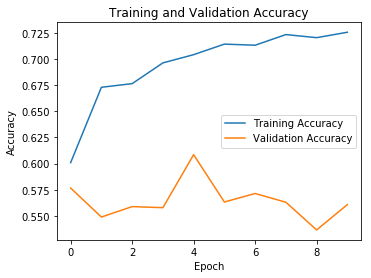

In [103]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

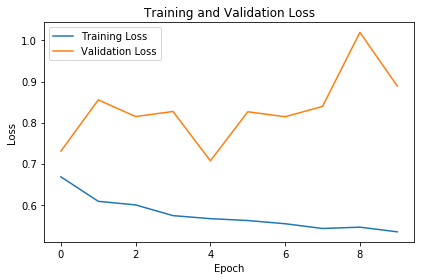

In [104]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()